In [ ]:
# Part 1: Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load Data
try:
    df = pd.read_csv('score.csv')
except FileNotFoundError:
    print("Error: 'score.csv' not found. Please ensure the file is in the correct directory.")
    # In a Colab environment, you would typically upload the file or mount Google Drive here.
    exit()

# Display the first few rows
print("Data Head:")
print(df.head())

# Separate features (X: Hours) and target (y: Scores)
X = df[['Hours']]
y = df['Scores']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("\nData split into Training (80%) and Testing (20%) sets.")

Data Head:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Data split into Training (80%) and Testing (20%) sets.


In [ ]:
# Train Linear Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# --- Output Model Parameters ---
print("--- Linear Regression Model ---")
print(f"Coefficient (Slope): {regressor.coef_[0]:.4f}")
print(f"Intercept: {regressor.intercept_:.4f}")
print(f"Regression Equation: Scores = {regressor.coef_[0]:.2f} * Hours + {regressor.intercept_:.2f}")

# 3. Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Error Metrics (Test Set) ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

--- Linear Regression Model ---
Coefficient (Slope): 9.9107
Intercept: 2.0182
Regression Equation: Scores = 9.91 * Hours + 2.02

--- Error Metrics (Test Set) ---
Mean Absolute Error (MAE): 4.1839
Mean Squared Error (MSE): 21.5988
Root Mean Squared Error (RMSE): 4.6474


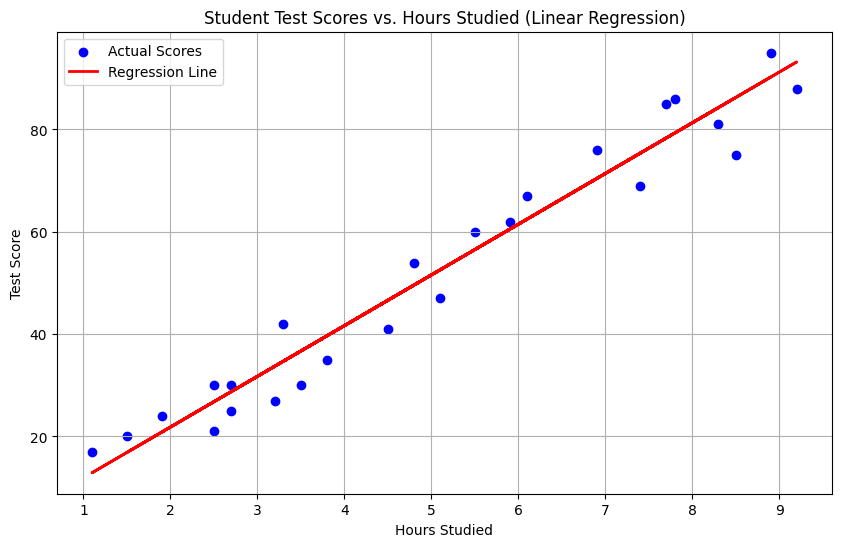


--- Actual vs Predicted Scores (Test Set) ---
   Actual  Predicted  Residuals
0      20      16.88       3.12
1      27      33.73      -6.73
2      69      75.36      -6.36
3      30      26.79       3.21
4      62      60.49       1.51


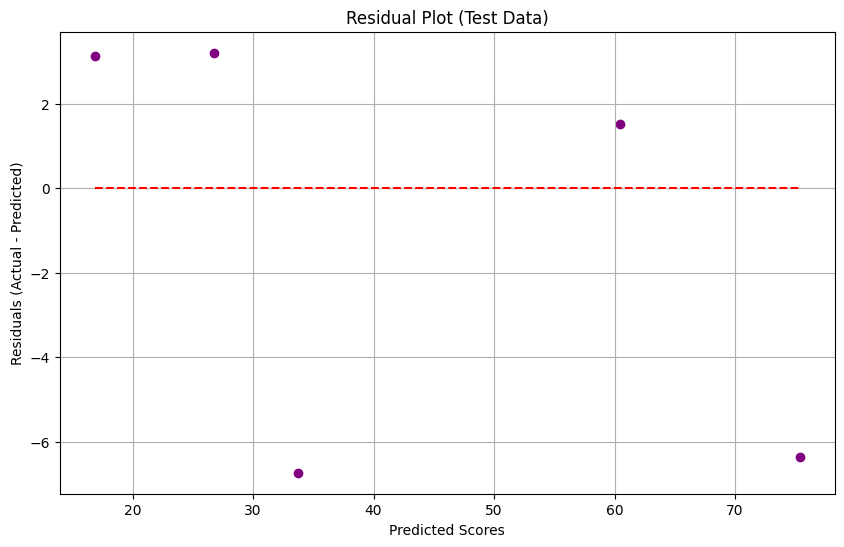

In [ ]:
# Calculate predictions for the entire dataset (for plotting the regression line)
y_all_pred = regressor.predict(X)

# 4. Plot Regression Line and Predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Scores')
# Plot the regression line
plt.plot(X, y_all_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Student Test Scores vs. Hours Studied (Linear Regression)')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.legend()
plt.grid(True)
plt.show() # Use plt.show() in a Colab environment

# 5. Residual Concept and Plot
# Calculate residuals for the test set
residuals = y_test - y_pred

# Create a DataFrame to show Actual, Predicted, and Residuals
comparison_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten(), 'Residuals': residuals.values.flatten()})
print("\n--- Actual vs Predicted Scores (Test Set) ---")
print(comparison_df.round(2))

# Plot the residuals
plt.figure(figsize=(10, 6))
# Plot residuals against the predicted values
plt.scatter(y_pred, residuals, color='purple')
# Draw a horizontal line at residual = 0
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--')
plt.title('Residual Plot (Test Data)')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show() # Use plt.show() in a Colab environment